In [2]:
using Plots
pyplot()
using ColoringNames
using CSVFiles
using DataFrames
pyplot()

Plots.PyPlotBackend()

In [3]:
runnum = "0b"
function mklogdir(name)
    logdir = joinpath(pwd(), "logs", "dist", name * runnum)
    mkpath(logdir)
    logdir
end

mklogdir (generic function with 1 method)

In [4]:
function get_saveplot(mdlname)
    figpath = joinpath("demo", "dist", mdlname)
    mkpath(figpath)
    function saveplot(mdl, colorname)
        filename = joinpath(figpath, colorname*".png")
        savefig(plot_query(mdl, colorname), filename)
    end
end


function qualitative_demo(mdl, do_oov=true;
        demofun=display∘plot_query,
        #demofun=(mdl,name)->nothing
        #demofun=(mdl,name)->savefig(plot_query(mdl, name), name),
    )
        demofun(mdl,  "brownish green")
        demofun(mdl,  "brown")
        demofun(mdl,  "brownish")
        demofun(mdl,  "greenish")
        demofun(mdl,  "greenish brown")
        demofun(mdl,  "green")
        
        demofun(mdl,  "bluish grey")
        demofun(mdl,  "greyish blue")
        demofun(mdl, "pink-purple")
        demofun(mdl, "purple-pink")
        demofun(mdl, "brown-orange")
        demofun(mdl, "orange-brown")
        demofun(mdl, "orange-yellow")
        demofun(mdl, "yellow-orange")
        
        demofun(mdl, "purple")
        demofun(mdl, "purplish")
        demofun(mdl, "black")
        demofun(mdl, "white")
        
    
        demofun(mdl, "grey")
        do_oov && demofun(mdl, "Gray")
        do_oov && demofun(mdl, "Purple")
        do_oov && demofun(mdl, "Brown")
        do_oov && demofun(mdl, "gray")
        do_oov && demofun(mdl, "grey")
        do_oov && demofun(mdl, "Green")
        do_oov && demofun(mdl,  "brownish Green")
        do_oov && demofun(mdl,  "bluish gray")

        
        do_oov && demofun(mdl,  "ish")
end

qualitative_demo(mdl::TermToColorDistributionEmpirical; kwargs...) = qualitative_demo(mdl, false; kwargs...)

qualitative_demo (generic function with 3 methods)

In [5]:
const many_names = load_color_nameset()
const word_embs, vocab, enc = load_text_embeddings(keep_words=many_names)
const full_data = load_munroe_data(dev_as_train=false, dev_as_test=false, encoding_ = enc)

const ord_data = order_relevant_dataset(full_data);
const extrapo_data = extrapolation_dataset(full_data);

In [27]:
create_res_df() = DataFrame(method=String[], 
    perp=Float64[],
    #perp_hue=Float64[],
    #perp_sat=Float64[],
    #perp_val=Float64[],
    #mse_to_distmode=Float64[],
    mse_to_distmean=Float64[]
)

full_df = create_res_df()
extrapo_df = create_res_df()
ord_df = create_res_df()

function perform_evaluation(modeltype, name, smoothed)
    name *= smoothed ? "-smoothed" : ""
    info(name)
    
    function mdlfun(cldata)
        mdl = modeltype(enc, word_embs; n_steps=size(cldata.train.terms_padded,1))
        train!(mdl, cldata, Val{smoothed}(); log_dir = mklogdir(name))
        mdl
    end
    
    
    ###################
    if doextrapo(modeltype)
        extrapo_mdl = mdlfun(extrapo_data)
        println()
        @show res_extrapo = evaluate(extrapo_mdl, extrapo_data.test)
        res_extrapo[:method] = name * " Extrapolating"
        push!(extrapo_df, res_extrapo)
    end
    
    
    ######
    full_mdl = mdlfun(full_data)
    println()
    @show res_full = evaluate(full_mdl, full_data.test)
    res_full[:method] = name
    push!(full_df, res_full)
    
    qualitative_demo(full_mdl; demofun=get_saveplot(name))
    
    #######
    println()
    @show res_ord = evaluate(full_mdl, ord_data.test)
    res_ord[:method] = name
    push!(ord_df, res_ord)
    
    
    #######
    @show  res_nonextrapo = evaluate(full_mdl, extrapo_data.test)
    println()
    res_nonextrapo[:method] = name * " Non-extrapolating"
    push!(extrapo_df, res_nonextrapo)
    
    
    ####
    save("results/raw/dist_full.csv", full_df)
    save("results/raw/dist_extrapo.csv", extrapo_df)
    save("results/raw/dist_ord.csv", ord_df)
    
    full_mdl
end

function perform_evaluation(modeltype, name)
    perform_evaluation(modeltype, name, false)
    perform_evaluation(modeltype, name, true)
end

doextrapo(::Any) = true
doextrapo(::Type{TermToColorDistributionEmpirical}) = false

doextrapo (generic function with 2 methods)

In [ ]:
namedmodels = [
    (TermToColorDistributionEmpirical, "Direct"),
    (TermToColorDistributionSOWE, "SOWE"),
    (TermToColorDistributionCNN, "CNN"),
    (TermToColorDistributionRNN, "RNN"),    
]

for (modeltype, name) in namedmodels
    perform_evaluation(modeltype, name)
end;

INFO: Direct



res_full = evaluate(full_mdl, full_data.test) = Dict{Symbol,Any}(Pair{Symbol,Any}(:perp, 2.75356e6),Pair{Symbol,Any}(:mse_to_distmean, 0.0663561))
(h_max, s_max, v_max) = (0.20392156862745098, 0.6705882352941176, 0.49411764705882355)
(h_max, s_max, v_max) = (0.08235294117647059, 1.0, 0.5176470588235295)
(h_max, s_max, v_max) = (0.07058823529411765, 0.6196078431372549, 0.6)
(h_max, s_max, v_max) = (0.4196078431372549, 0.6588235294117647, 0.7333333333333333)
(h_max, s_max, v_max) = (0.1450980392156863, 0.9333333333333333, 0.4235294117647059)
(h_max, s_max, v_max) = (0.3411764705882353, 1.0, 0.803921568627451)
(h_max, s_max, v_max) = (0.592156862745098, 0.24705882352941178, 0.5843137254901961)
(h_max, s_max, v_max) = (0.5882352941176471, 0.27058823529411763, 0.6823529411764706)
(h_max, s_max, v_max) = (0.8392156862745098, 0.5254901960784314, 0.8784313725490196)
(h_max, s_max, v_max) = (0.8431372549019608, 0.9176470588235294, 0.9725490196078431)
(h_max, s_max, v_max) = (0.0705882352941176

INFO: Direct-smoothed



res_full = evaluate(full_mdl, full_data.test) = Dict{Symbol,Any}(Pair{Symbol,Any}(:perp, 1.19449e6),Pair{Symbol,Any}(:mse_to_distmean, 0.0663674))
(h_max, s_max, v_max) = (0.16862745098039217, 0.6470588235294118, 0.49411764705882355)
(h_max, s_max, v_max) = (0.08627450980392157, 0.7568627450980392, 0.5490196078431373)
(h_max, s_max, v_max) = (0.058823529411764705, 0.49411764705882355, 0.5843137254901961)
(h_max, s_max, v_max) = (0.41568627450980394, 0.6470588235294118, 0.7372549019607844)
(h_max, s_max, v_max) = (0.1450980392156863, 0.9215686274509803, 0.5098039215686274)
(h_max, s_max, v_max) = (0.33725490196078434, 0.996078431372549, 0.803921568627451)
(h_max, s_max, v_max) = (0.5803921568627451, 0.20784313725490197, 0.6980392156862745)
(h_max, s_max, v_max) = (0.5490196078431373, 0.29411764705882354, 0.6862745098039216)
(h_max, s_max, v_max) = (0.8588235294117647, 0.6823529411764706, 0.8392156862745098)
(h_max, s_max, v_max) = (0.8431372549019608, 0.7098039215686275, 0.874509803921

INFO: SOWE



res_extrapo = evaluate(extrapo_mdl, extrapo_data.test) = Dict{Symbol,Any}(Pair{Symbol,Any}(:perp, 9.29211e5),Pair{Symbol,Any}(:mse_to_distmean, 0.0763948))

res_full = evaluate(full_mdl, full_data.test) = Dict{Symbol,Any}(Pair{Symbol,Any}(:perp, 1.25572e6),Pair{Symbol,Any}(:mse_to_distmean, 0.0679461))
(h_max, s_max, v_max) = (0.1568627450980392, 1.0, 0.5098039215686274)
(h_max, s_max, v_max) = (0.09019607843137255, 1.0, 0.4627450980392157)
(h_max, s_max, v_max) = (0.09803921568627451, 0.4823529411764706, 0.615686274509804)
(h_max, s_max, v_max) = (0.3803921568627451, 1.0, 0.8117647058823529)
(h_max, s_max, v_max) = (0.1568627450980392, 1.0, 0.5098039215686274)
(h_max, s_max, v_max) = (0.3333333333333333, 1.0, 0.9490196078431372)
(h_max, s_max, v_max) = (0.592156862745098, 0.27058823529411763, 0.6313725490196078)
(h_max, s_max, v_max) = (0.592156862745098, 0.27058823529411763, 0.6313725490196078)
(h_max, s_max, v_max) = (0.8235294117647058, 0.6039215686274509, 0.8509803921568627)
(h_m

INFO: SOWE-smoothed



res_extrapo = evaluate(extrapo_mdl, extrapo_data.test) = Dict{Symbol,Any}(Pair{Symbol,Any}(:perp, 9.42046e5),Pair{Symbol,Any}(:mse_to_distmean, 0.0764292))

res_full = evaluate(full_mdl, full_data.test) = Dict{Symbol,Any}(Pair{Symbol,Any}(:perp, 1.26527e6),Pair{Symbol,Any}(:mse_to_distmean, 0.0680232))
(h_max, s_max, v_max) = (0.1568627450980392, 0.7019607843137254, 0.5607843137254902)
(h_max, s_max, v_max) = (0.08627450980392157, 0.8666666666666667, 0.5803921568627451)
(h_max, s_max, v_max) = (0.09019607843137255, 0.6549019607843137, 0.592156862745098)
(h_max, s_max, v_max) = (0.39215686274509803, 0.9137254901960784, 0.7490196078431373)
(h_max, s_max, v_max) = (0.1568627450980392, 0.7019607843137254, 0.5607843137254902)
(h_max, s_max, v_max) = (0.30980392156862746, 0.9411764705882353, 0.9254901960784314)
(h_max, s_max, v_max) = (0.5686274509803921, 0.26666666666666666, 0.6666666666666666)
(h_max, s_max, v_max) = (0.5686274509803921, 0.26666666666666666, 0.6666666666666666)
(h_max, s_

INFO: CNN



res_extrapo = evaluate(extrapo_mdl, extrapo_data.test) = Dict{Symbol,Any}(Pair{Symbol,Any}(:perp, 1.09565e6),Pair{Symbol,Any}(:mse_to_distmean, 0.0843781))

res_full = evaluate(full_mdl, full_data.test) = Dict{Symbol,Any}(Pair{Symbol,Any}(:perp, 1.30809e6),Pair{Symbol,Any}(:mse_to_distmean, 0.0686327))
(h_max, s_max, v_max) = (0.1568627450980392, 1.0, 0.5333333333333333)
(h_max, s_max, v_max) = (0.09803921568627451, 1.0, 0.615686274509804)
(h_max, s_max, v_max) = (0.09803921568627451, 0.6666666666666666, 0.615686274509804)
(h_max, s_max, v_max) = (0.396078431372549, 1.0, 0.7098039215686275)
(h_max, s_max, v_max) = (0.1568627450980392, 1.0, 0.4470588235294118)
(h_max, s_max, v_max) = (0.3058823529411765, 1.0, 0.8313725490196079)
(h_max, s_max, v_max) = (0.5686274509803921, 0.2196078431372549, 0.6313725490196078)
(h_max, s_max, v_max) = (0.5568627450980392, 0.2784313725490196, 0.6313725490196078)
(h_max, s_max, v_max) = (0.8666666666666667, 0.5607843137254902, 1.0)
(h_max, s_max, v_max)

INFO: CNN-smoothed



res_extrapo = evaluate(extrapo_mdl, extrapo_data.test) = 

In [31]:
1

1

In [35]:
1+rand()

1.8447675252005802

In [7]:
mdl = TermToColorDistributionSOWE(enc, word_embs; n_steps=size(full_data.train.terms_padded,1))


2018-06-19 12:22:28.805564: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2


ColoringNames.TermToColorDistributionSOWE{TensorFlow.Tensor{Any},MLLabelUtils.LabelEnc.NativeLabels{String,2834},TensorFlow.Tensor{String}}(MLLabelUtils.LabelEnc.NativeLabels{String,2834}(String["and", "of", "a", "with", "'s", "not", "-", "your", "just", "can"  …  "Feijoa", "melanzane", "minsk", "Pizazz", "feijoa", "red1", "Kilamanjaro", "karaka", "bilbao", "mabel"], Dict("Apple"=>157,"Caper"=>2160,"chocolate"=>424,"Casablanca"=>1155,"Many"=>84,"Luxor"=>1613,"star"=>103,"canyon"=>900,"bombay"=>2563,"bondi"=>2662…)), Session(Ptr{Void} @0x00007ff1ae78acb0), <Tensor Group:1 shape=unknown dtype=Any>, <Tensor MergeSummary:1 shape=unknown dtype=String>)

In [13]:
train!(mdl, full_data, Val{false}(); log_dir = mklogdir("SOWE"))

ColoringNames.TermToColorDistributionSOWE{TensorFlow.Tensor{Any},MLLabelUtils.LabelEnc.NativeLabels{String,2834},TensorFlow.Tensor{String}}(MLLabelUtils.LabelEnc.NativeLabels{String,2834}(String["and", "of", "a", "with", "'s", "not", "-", "your", "just", "can"  …  "Feijoa", "melanzane", "minsk", "Pizazz", "feijoa", "red1", "Kilamanjaro", "karaka", "bilbao", "mabel"], Dict("Apple"=>157,"Caper"=>2160,"chocolate"=>424,"Casablanca"=>1155,"Many"=>84,"Luxor"=>1613,"star"=>103,"canyon"=>900,"bombay"=>2563,"bondi"=>2662…)), Session(Ptr{Void} @0x00007ff1ae78acb0), <Tensor Group:1 shape=unknown dtype=Any>, <Tensor MergeSummary:1 shape=unknown dtype=String>)

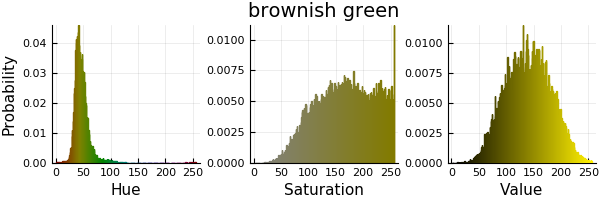

(h_max, s_max, v_max) = (0.1568627450980392, 1.0, 0.5098039215686274)


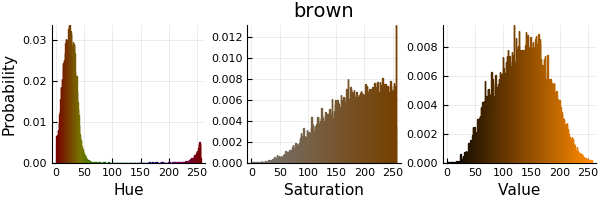

(h_max, s_max, v_max) = (0.09019607843137255, 1.0, 0.4627450980392157)


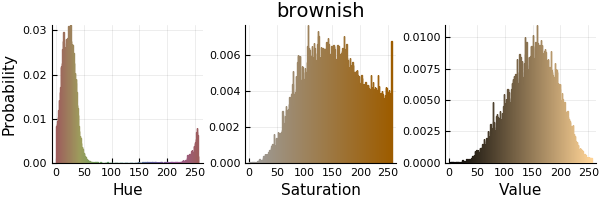

(h_max, s_max, v_max) = (0.09803921568627451, 0.4117647058823529, 0.615686274509804)


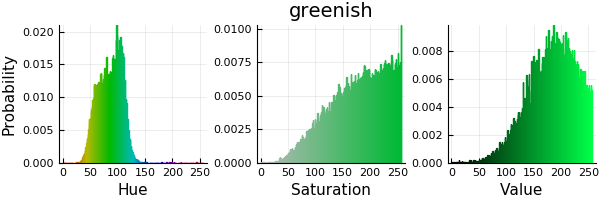

(h_max, s_max, v_max) = (0.3803921568627451, 1.0, 0.7254901960784313)


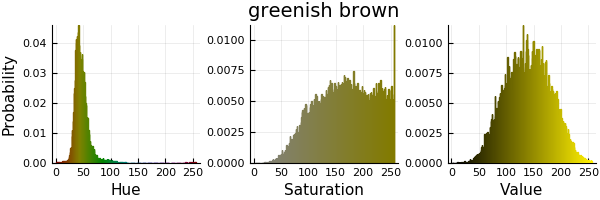

(h_max, s_max, v_max) = (0.1568627450980392, 1.0, 0.5098039215686274)


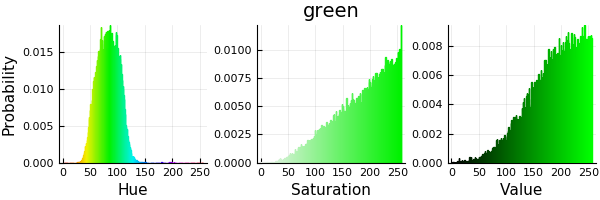

(h_max, s_max, v_max) = (0.3333333333333333, 1.0, 0.9490196078431372)


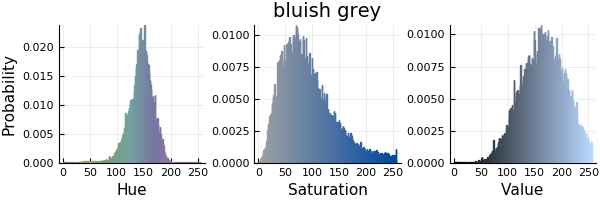

(h_max, s_max, v_max) = (0.592156862745098, 0.27058823529411763, 0.6313725490196078)


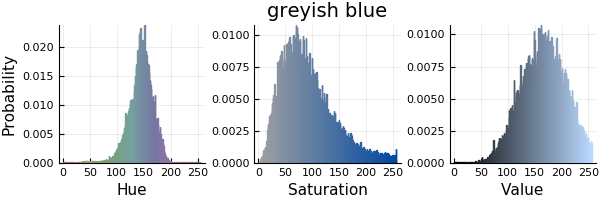

(h_max, s_max, v_max) = (0.592156862745098, 0.27058823529411763, 0.6313725490196078)


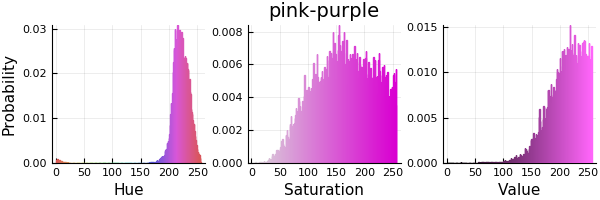

(h_max, s_max, v_max) = (0.8392156862745098, 0.6039215686274509, 0.8509803921568627)


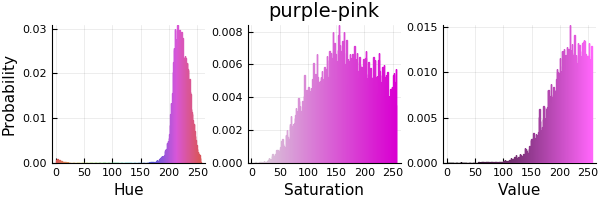

(h_max, s_max, v_max) = (0.8392156862745098, 0.6039215686274509, 0.8509803921568627)


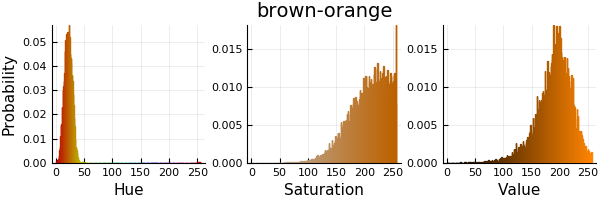

(h_max, s_max, v_max) = (0.08627450980392157, 1.0, 0.7372549019607844)


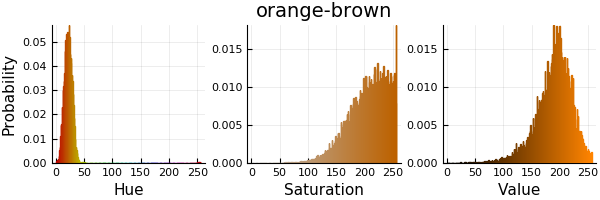

(h_max, s_max, v_max) = (0.08627450980392157, 1.0, 0.7372549019607844)


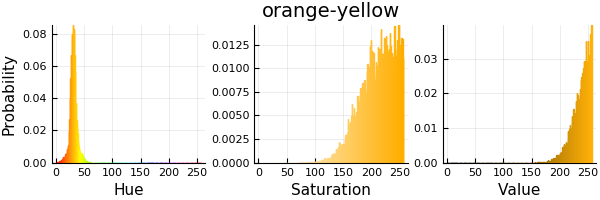

(h_max, s_max, v_max) = (0.11372549019607843, 0.9686274509803922, 1.0)


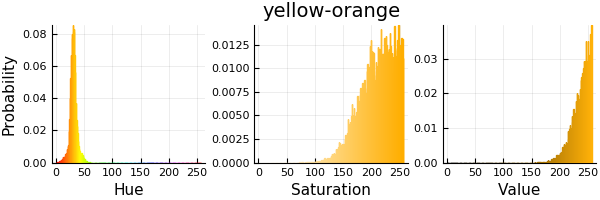

(h_max, s_max, v_max) = (0.11372549019607843, 0.9686274509803922, 1.0)


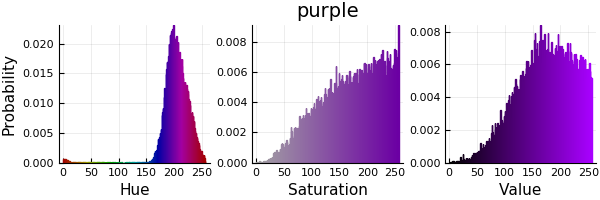

(h_max, s_max, v_max) = (0.7764705882352941, 1.0, 0.6392156862745098)


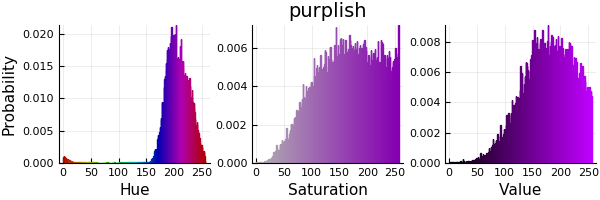

(h_max, s_max, v_max) = (0.792156862745098, 1.0, 0.6941176470588235)


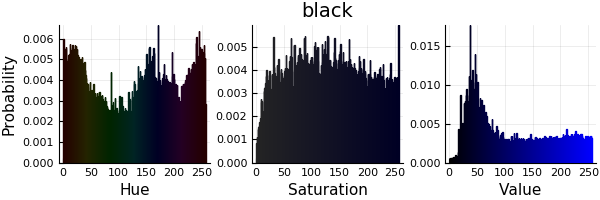

(h_max, s_max, v_max) = (0.6666666666666666, 1.0, 0.1411764705882353)


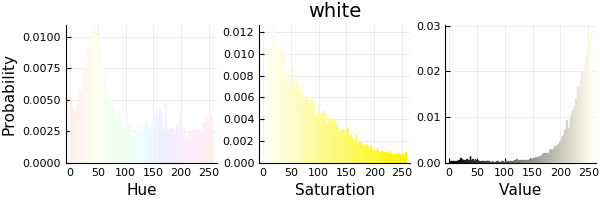

(h_max, s_max, v_max) = (0.1607843137254902, 0.06274509803921569, 0.996078431372549)


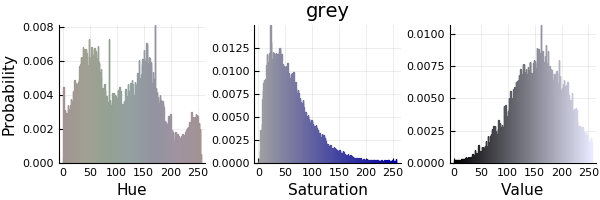

(h_max, s_max, v_max) = (0.6666666666666666, 0.08627450980392157, 0.6313725490196078)


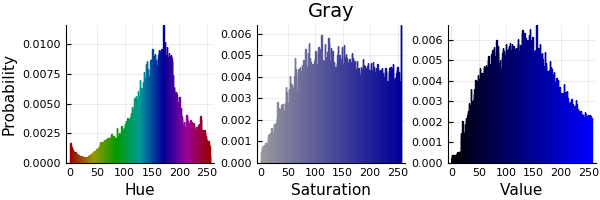

(h_max, s_max, v_max) = (0.6666666666666666, 1.0, 0.6039215686274509)


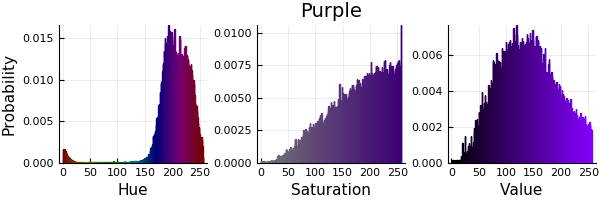

(h_max, s_max, v_max) = (0.7529411764705882, 1.0, 0.4627450980392157)


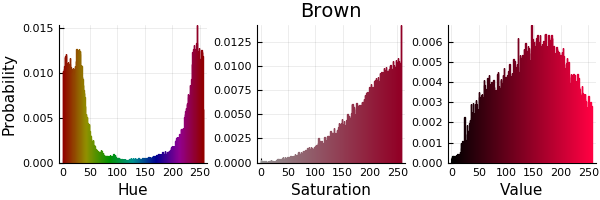

(h_max, s_max, v_max) = (0.9568627450980393, 1.0, 0.5686274509803921)


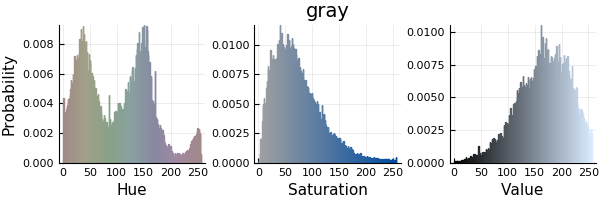

(h_max, s_max, v_max) = (0.5882352941176471, 0.15294117647058825, 0.6313725490196078)


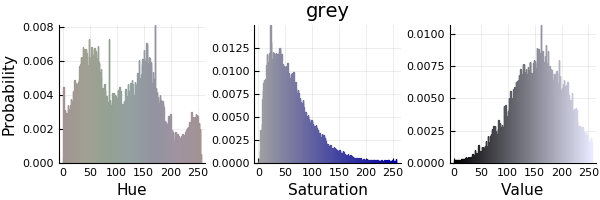

(h_max, s_max, v_max) = (0.6666666666666666, 0.08627450980392157, 0.6313725490196078)


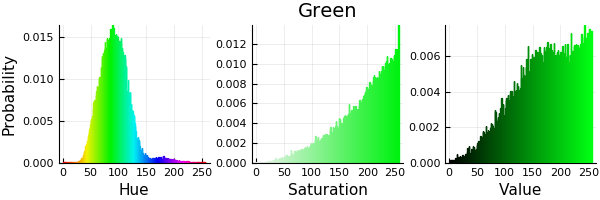

(h_max, s_max, v_max) = (0.34509803921568627, 1.0, 0.9490196078431372)


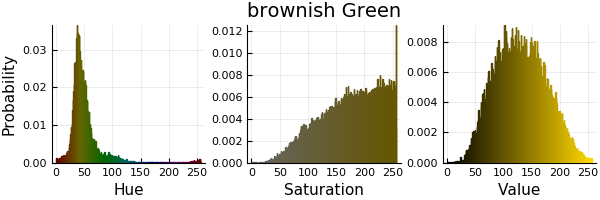

(h_max, s_max, v_max) = (0.1411764705882353, 1.0, 0.396078431372549)


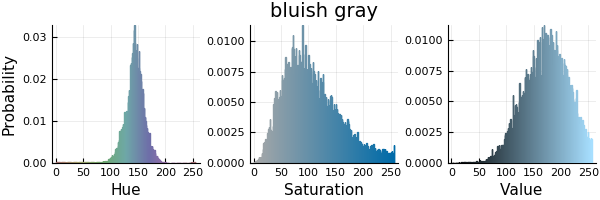

(h_max, s_max, v_max) = (0.5607843137254902, 0.34509803921568627, 0.6588235294117647)


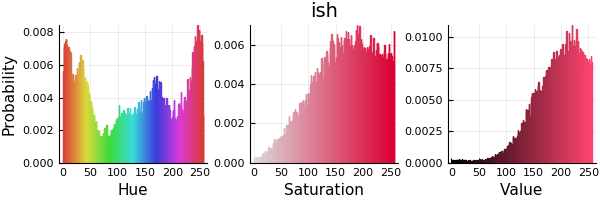

(h_max, s_max, v_max) = (0.9607843137254902, 0.7372549019607844, 0.8588235294117647)


In [18]:
qualitative_demo(mdl)
    #demofun = get_saveplot("SOWE"))

# Oracle


In [ ]:
oracle_cldata = load_munroe_data(dev_as_train=true, dev_as_test=true)#, encoding_ = enc)
oracle_noml_unsmoothed =  TermToColorDistributionEmpirical(256)
train!(oracle_noml_unsmoothed, oracle_cldata, Val{false}(); remove_zeros_hack=false)
@show evaluate(oracle_noml_unsmoothed, oracle_cldata.dev)

In [ ]:
qualitative_demo(oracle_noml_unsmoothed,
    demofun = get_saveplot("oracle_noml_unsmoothed"))

In [ ]:
plot_query(oracle_noml_unsmoothed, "black")

In [ ]:
ColoringNames.order_relevant_name_pairs(full_data.train)

In [ ]:
38*2

In [ ]:
ind = findfirst(full_data.dev.texts.=="light blue-green")

In [ ]:
function mdlfun(modeltype, cldata, smoothed)
    mdl = modeltype(enc, word_embs; n_steps=size(cldata.train.terms_padded,1))
    train!(mdl, cldata, Val{smoothed}(); log_dir = mklogdir(name))
    mdl
end

sowe = mdlfun(TermToColorDistributionSOWE, full_data, false)

In [ ]:
        plot_query(mdl,  "greenish brown") |> display
        plot_query(mdl,  "green")|> display

In [39]:
all_names = Set(full_data.dev.texts)
@assert "Brown" ∉ all_names
@assert "gray" ∉ all_names
@assert "Gray" ∉ all_names
@assert "Green" ∉ all_names
@assert "Purple" ∉ all_names

In [6]:
mdl = TermToColorDistributionRNN(enc, word_embs; n_steps=size(full_data.train.terms_padded,1))


2018-06-21 16:35:59.425739: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2


ColoringNames.TermToColorDistributionRNN{TensorFlow.Tensor{Any},MLLabelUtils.LabelEnc.NativeLabels{String,2834},TensorFlow.Tensor{String}}(MLLabelUtils.LabelEnc.NativeLabels{String,2834}(String["and", "of", "a", "with", "'s", "not", "-", "your", "just", "can"  …  "Feijoa", "melanzane", "minsk", "Pizazz", "feijoa", "red1", "Kilamanjaro", "karaka", "bilbao", "mabel"], Dict("Apple"=>157,"Caper"=>2160,"chocolate"=>424,"Casablanca"=>1155,"Many"=>84,"Luxor"=>1613,"star"=>103,"canyon"=>900,"bombay"=>2563,"bondi"=>2662…)), Session(Ptr{Void} @0x00007f7e0d021050), <Tensor Group:1 shape=unknown dtype=Any>, <Tensor MergeSummary:1 shape=unknown dtype=String>)

## Sanity Check RNN term-order
as RNN is being dominated by first term which is unexpected

In [18]:
@show full_data.dev.terms_padded[:,1:1]
run(mdl.sess, TensorFlow.unstack(mdl.sess.graph["terms_emb"]; axis=1),
    Dict(mdl.sess.graph["terms"]=>full_data.dev.terms_padded[:,1:1])
    )

full_data.dev.terms_padded[:, 1:1] = [338; 114; 0; 0; 0; 0]


6-element Array{Array{Float32,2},1}:
 Float32[-0.269 -0.1386 … -0.1023 0.0941]
 Float32[0.0404 0.0621 … 0.1542 0.1528]  
 Float32[0.0 0.0 … 0.0 0.0]              
 Float32[0.0 0.0 … 0.0 0.0]              
 Float32[0.0 0.0 … 0.0 0.0]              
 Float32[0.0 0.0 … 0.0 0.0]              

In [21]:
@show full_data.dev.terms_padded[:,1:1]
run(mdl.sess, TensorFlow.unstack(mdl.sess.graph["terms_emb"]; axis=1),
    Dict(mdl.sess.graph["terms"]=>[338 338 0 0 0 0]')
    )

full_data.dev.terms_padded[:, 1:1] = [338; 114; 0; 0; 0; 0]


6-element Array{Array{Float32,2},1}:
 Float32[-0.269 -0.1386 … -0.1023 0.0941]
 Float32[-0.269 -0.1386 … -0.1023 0.0941]
 Float32[0.0 0.0 … 0.0 0.0]              
 Float32[0.0 0.0 … 0.0 0.0]              
 Float32[0.0 0.0 … 0.0 0.0]              
 Float32[0.0 0.0 … 0.0 0.0]              